<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/57_cartoee_blend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) if needed. Keep in mind that cartopy can be challenging to install. If you are unable to install cartopy on your computer, you can try Google Colab with this the [notebook example](https://colab.research.google.com/github/gee-community/geemap/blob/master/docs/notebooks/cartoee_colab.ipynb). 

See below the commands to install cartopy and geemap using conda/mamba:

```
conda create -n carto python=3.8
conda activate carto
conda install mamba -c conda-forge
mamba install cartopy scipy -c conda-forge
mamba install geemap -c conda-forge
jupyter notebook
```

In [ ]:
# !pip install cartopy scipy
# !pip install geemap

# Creating publication-quality maps with multiple Earth Engine layers

In [1]:
import ee
import geemap
from geemap import cartoee
import cartopy.crs as ccrs

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Create an interactive map

In [2]:
Map = geemap.Map()

image = (
    ee.ImageCollection("MODIS/MCD43A4_006_NDVI")
    .filter(ee.Filter.date("2018-04-01", "2018-05-01"))
    .select("NDVI")
    .first()
)

vis_params = {
    "min": 0.0,
    "max": 1.0,
    "palette": [
        "FFFFFF",
        "CE7E45",
        "DF923D",
        "F1B555",
        "FCD163",
        "99B718",
        "74A901",
        "66A000",
        "529400",
        "3E8601",
        "207401",
        "056201",
        "004C00",
        "023B01",
        "012E01",
        "011D01",
        "011301",
    ],
}
Map.setCenter(-7.03125, 31.0529339857, 2)
Map.addLayer(image, vis_params, "MODIS NDVI")

countries = ee.FeatureCollection("users/giswqs/public/countries")
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")

ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))

Map.addLayer(blend, {}, "Blend")

Map

Map(center=[31.0529339857, -7.03125], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=S…

## Plot an image with the default projection

In [3]:
# specify region to focus on
bbox = [180, -88, -180, 88]

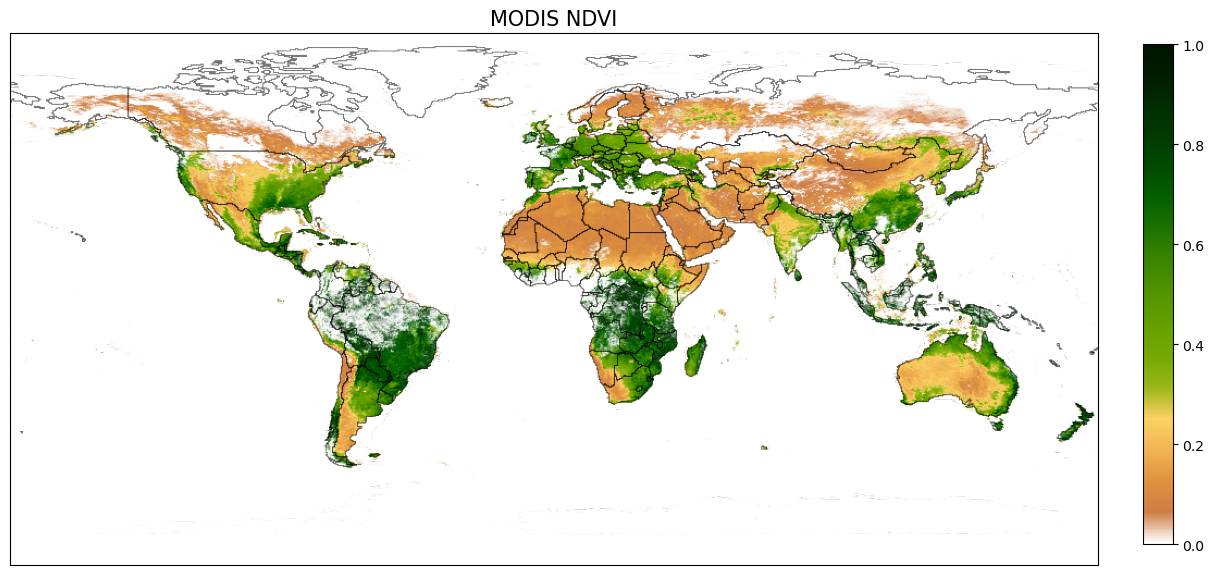

In [4]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI", fontsize=15)

# ax.coastlines()
plt.show()

## Plot an image with a different projection

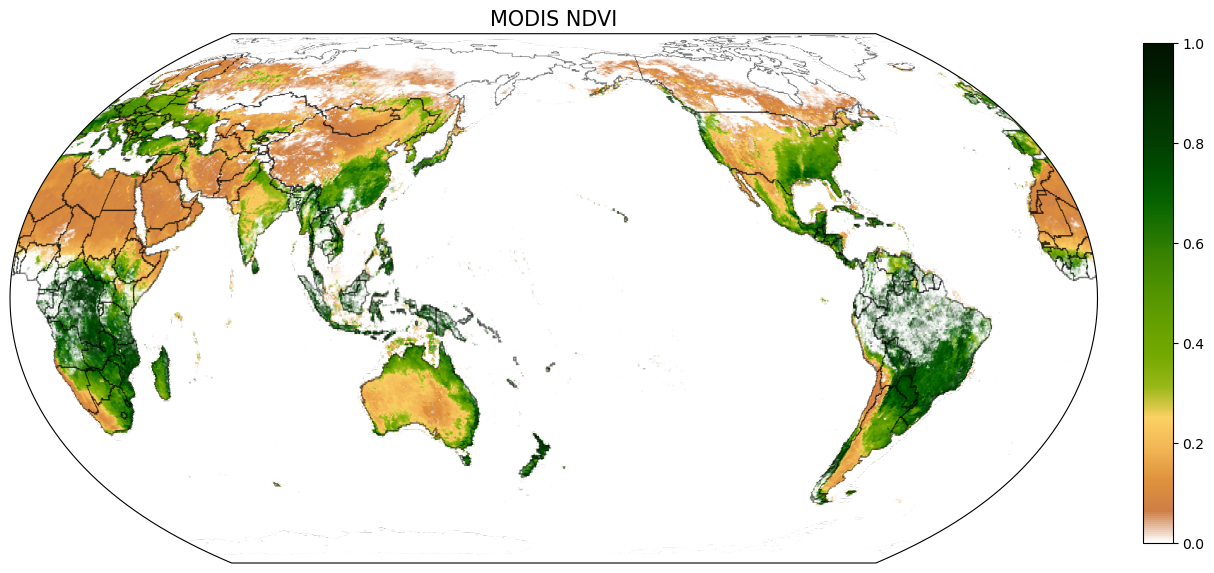

In [5]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend, region=bbox, proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI", fontsize=15)

# ax.coastlines()
plt.show()